In [1]:
from utils import *

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

### Carregando o Dataset

In [2]:
df = pd.read_csv('../data/raw_data/data.csv')

In [3]:
dt_submit = pd.read_csv('../data/submit/meds_test_alunos.csv')

### Verificando valores NaN

In [4]:
# Verificando quais colunas possuem valores NaN
nan_train = df.isnull().sum()
nan_train = nan_train[nan_train > 0]

print(nan_train)

Series([], dtype: int64)


### Separando os Dados

In [5]:
df_train, df_val, df_test = split_data(df, train_frac=0.7, val_frac=0.15, test_frac=0.15)
# df_train, df_val, df_test = split_data(df)

In [6]:
df_train_indoor = df_train[df_train['indoor'] == True]
df_train_outdoor = df_train[df_train['indoor'] == False]

df_val_indoor = df_val[df_val['indoor'] == True]
df_val_outdoor = df_val[df_val['indoor'] == False]

In [7]:
print("Train indoor size: ", df_train_indoor.shape[0])
print("Train outdoor size: ", df_train_outdoor.shape[0])

print("Validation indoor size: ", df_val_indoor.shape[0])
print("Validation outdoor size: ", df_val_outdoor.shape[0])

Train indoor size:  3226
Train outdoor size:  1516
Validation indoor size:  708
Validation outdoor size:  308


In [8]:
df_train_outdoor = balance_distribution(df_train_outdoor)
df_val_outdoor = balance_distribution(df_val_outdoor)

In [9]:
df_train = pd.concat([df_train_indoor, df_train_outdoor], ignore_index=False)
df_train = df_train.sample(frac=1, replace=False).reset_index(drop=True)

df_val = pd.concat([df_val_indoor, df_val_outdoor], ignore_index=False)
df_val = df_val.sample(frac=1, replace=False).reset_index(drop=True)

#### Plotando distribuição dos usuários no conjunto de treino

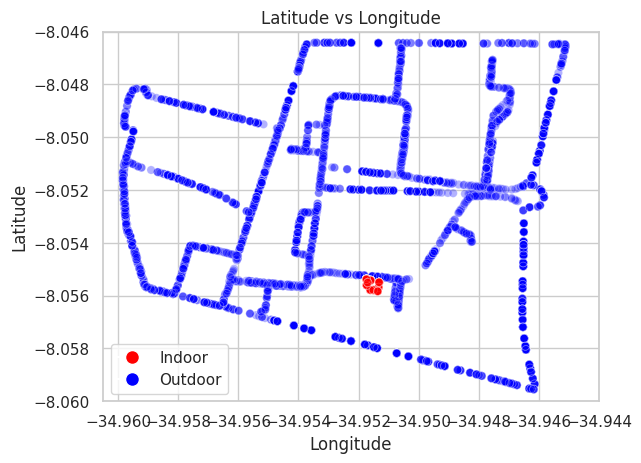

In [10]:
plot_distribution_comp(df_train)

In [11]:
map = plot_folium_map(df_train_indoor[['lat', 'lon']].values, df_train_outdoor[['lat', 'lon']].values, False, 'Outdoor', 'Indoor')
map

### Normalizando os dados

In [12]:
columns_to_normalize = [
    'rssi_1_1', 'rssi_1_2', 'rssi_1_3',
    'rssi_2_1', 'rssi_2_2', 'rssi_2_3',
    'rssi_3_1', 'rssi_3_2', 'rssi_3_3',
    'delay_1', 'delay_2', 'delay_3'
]

In [13]:
scaler = MinMaxScaler()

In [14]:
scaler.fit(df_train[columns_to_normalize])

MinMaxScaler()

In [15]:
df_train[columns_to_normalize] = scaler.transform(df_train[columns_to_normalize])
df_val[columns_to_normalize] = scaler.transform(df_val[columns_to_normalize])
df_test[columns_to_normalize] = scaler.transform(df_test[columns_to_normalize])
dt_submit[columns_to_normalize] = scaler.transform(dt_submit[columns_to_normalize])

In [16]:
df_train = pd.DataFrame(df_train)
df_val = pd.DataFrame(df_val)
df_test = pd.DataFrame(df_test)
dt_submit = pd.DataFrame(dt_submit)

In [17]:
df_test.to_csv(f'../data/submit/Resultados_EquipeX_Metodo_Y.csv', index=False)

In [ ]:
df_train.head()

### Salvando os conjuntos

In [ ]:
dir = 'balanced_data'

In [ ]:
df_train.to_csv(f'../data/{dir}/train.csv', index=False)
df_val.to_csv(f'../data/{dir}/validation.csv', index=False)
df_test.to_csv(f'../data/{dir}/test.csv', index=False)